In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

In [ ]:
dataset_train= pd.read_csv('Google_Stock_Price_Train.csv')

In [ ]:
dataset_train

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"
...,...,...,...,...,...,...
1253,12/23/2016,790.90,792.74,787.28,789.91,"623,400"
1254,12/27/2016,790.68,797.86,787.66,791.55,"789,100"
1255,12/28/2016,793.70,794.23,783.20,785.05,"1,153,800"
1256,12/29/2016,783.33,785.93,778.92,782.79,"744,300"


In [ ]:
training_set= dataset_train.iloc[:,[1]].values

In [ ]:
training_set

array([[325.25],
       [331.27],
       [329.83],
       ...,
       [793.7 ],
       [783.33],
       [782.75]])

In [ ]:
training_set.shape

(1258, 1)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
sc= MinMaxScaler(feature_range= (0,1))
training_set_scaled= sc.fit_transform(training_set)

In [ ]:
training_set_scaled

array([[0.08581368],
       [0.09701243],
       [0.09433366],
       ...,
       [0.95725128],
       [0.93796041],
       [0.93688146]])

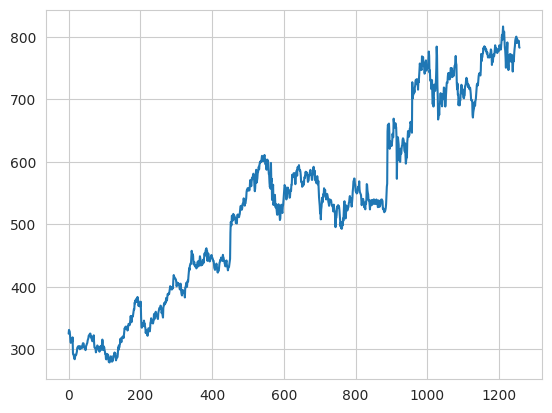

In [ ]:
plt.plot(training_set)

In [ ]:
#time step= 60
x_train= []
y_train= []
for i in range(60,len(training_set_scaled)):
  x_train.append(training_set_scaled[i-60:i,0])
  y_train.append(training_set_scaled[i,0])

In [ ]:
len(x_train)

1198

In [ ]:
len(y_train)

1198

In [ ]:
x_train, y_train= np.array(x_train), np.array(y_train)
print(x_train.shape)
print(y_train.shape)

(1198, 60)
(1198,)


In [ ]:
x_train= np.reshape(x_train,(1198,60,1))

In [ ]:
x_train.shape

(1198, 60, 1)

In [ ]:
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import LSTM
from keras.models import Sequential

In [ ]:
regressor= Sequential()
regressor.add(LSTM(units=100, return_sequences='True', input_shape=(x_train.shape[1],1)))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units=100, return_sequences='True'))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units=100, return_sequences='True'))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units=100))
regressor.add(Dropout(0.2))
regressor.add(Dense(units=1))

In [ ]:
regressor.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_5 (LSTM)               (None, 60, 100)           40800     
                                                                 
 dropout_4 (Dropout)         (None, 60, 100)           0         
                                                                 
 lstm_6 (LSTM)               (None, 60, 100)           80400     
                                                                 
 dropout_5 (Dropout)         (None, 60, 100)           0         
                                                                 
 lstm_7 (LSTM)               (None, 60, 100)           80400     
                                                                 
 dropout_6 (Dropout)         (None, 60, 100)           0         
                                                                 
 lstm_8 (LSTM)               (None, 100)              

In [ ]:
regressor.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
regressor.fit(x_train, y_train, epochs=100, batch_size=32)

Epoch 1/100
38/38 [==============================] - 14s 16ms/step - loss: 0.0370
Epoch 2/100
38/38 [==============================] - 0s 13ms/step - loss: 0.0051
Epoch 3/100
38/38 [==============================] - 0s 12ms/step - loss: 0.0044
Epoch 4/100
38/38 [==============================] - 0s 12ms/step - loss: 0.0041
Epoch 5/100
38/38 [==============================] - 0s 12ms/step - loss: 0.0043
Epoch 6/100
38/38 [==============================] - 0s 13ms/step - loss: 0.0035
Epoch 7/100
38/38 [==============================] - 0s 12ms/step - loss: 0.0036
Epoch 8/100
38/38 [==============================] - 0s 12ms/step - loss: 0.0031
Epoch 9/100
38/38 [==============================] - 0s 12ms/step - loss: 0.0033
Epoch 10/100
38/38 [==============================] - 1s 13ms/step - loss: 0.0035
Epoch 11/100
38/38 [==============================] - 0s 12ms/step - loss: 0.0028
Epoch 12/100
38/38 [==============================] - 0s 13ms/step - loss: 0.0028
Epoch 13/100
38/38 [====

In [ ]:
dataset_test= pd.read_csv('Google_Stock_Price_Test.csv')

In [ ]:
dataset_test.shape

(20, 6)

In [ ]:
real_stock_price= dataset_test.iloc[:,[1]].values

In [ ]:
real_stock_price

array([[778.81],
       [788.36],
       [786.08],
       [795.26],
       [806.4 ],
       [807.86],
       [805.  ],
       [807.14],
       [807.48],
       [807.08],
       [805.81],
       [805.12],
       [806.91],
       [807.25],
       [822.3 ],
       [829.62],
       [837.81],
       [834.71],
       [814.66],
       [796.86]])

In [ ]:
dataset_total= pd.concat((dataset_train['Open'], dataset_test['Open']), axis=0)

In [ ]:
dataset_total.shape

(1278,)

In [ ]:
inputs= dataset_total[len(dataset_total)-len(dataset_test)-60:].values

In [ ]:
1278-20-60

1198

In [ ]:
inputs.shape

(80,)

In [ ]:
inputs= inputs.reshape(-1,1)

In [ ]:
inputs.shape

(80, 1)

In [ ]:
inputs= sc.transform(inputs)
inputs

array([[0.9299055 ],
       [0.93113327],
       [0.92750577],
       [0.94415507],
       [0.93876032],
       [0.93403527],
       [0.93483518],
       [0.9313937 ],
       [0.94636878],
       [0.96569685],
       [0.97510976],
       [0.95966962],
       [0.97808617],
       [1.        ],
       [0.98076494],
       [0.97083116],
       [0.98450406],
       [0.96054394],
       [0.9371419 ],
       [0.92841729],
       [0.90804747],
       [0.8771858 ],
       [0.92153434],
       [0.93809063],
       [0.93165414],
       [0.95254483],
       [0.88812412],
       [0.88637547],
       [0.87032145],
       [0.88563137],
       [0.90743359],
       [0.91571173],
       [0.89941588],
       [0.91805566],
       [0.9089404 ],
       [0.9024853 ],
       [0.89456061],
       [0.91600938],
       [0.9132934 ],
       [0.88979835],
       [0.86589404],
       [0.89030062],
       [0.90335962],
       [0.89642086],
       [0.91777662],
       [0.93176576],
       [0.94114145],
       [0.957

In [ ]:
x_test= []
for i in range(60,80):
  x_test.append(inputs[i-60:i,0])

In [ ]:
len(x_test)

20

In [ ]:
x_test= np.array(x_test)

In [ ]:
x_test.shape

(20, 60)

In [ ]:
x_test= np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

In [ ]:
x_test.shape

(20, 60, 1)

In [ ]:
predicted_stock_price= regressor.predict(x_test)

1/1 [==============================] - 1s 1s/step


In [ ]:
predicted_stock_price

array([[0.95553976],
       [0.95067555],
       [0.9588401 ],
       [0.960017  ],
       [0.968159  ],
       [0.9816065 ],
       [0.98648024],
       [0.98360384],
       [0.9847434 ],
       [0.98684484],
       [0.9884251 ],
       [0.98845834],
       [0.9883769 ],
       [0.9907778 ],
       [0.992388  ],
       [1.0086197 ],
       [1.0212337 ],
       [1.0320576 ],
       [1.0304115 ],
       [1.0091927 ]], dtype=float32)

In [ ]:
real_stock_price

array([[778.81],
       [788.36],
       [786.08],
       [795.26],
       [806.4 ],
       [807.86],
       [805.  ],
       [807.14],
       [807.48],
       [807.08],
       [805.81],
       [805.12],
       [806.91],
       [807.25],
       [822.3 ],
       [829.62],
       [837.81],
       [834.71],
       [814.66],
       [796.86]])

In [ ]:
predicted_stock_price=sc.inverse_transform(predicted_stock_price)
predicted_stock_price

array([[792.77997],
       [790.16516],
       [794.5541 ],
       [795.18677],
       [799.5636 ],
       [806.79236],
       [809.4123 ],
       [807.866  ],
       [808.4787 ],
       [809.60834],
       [810.45776],
       [810.47565],
       [810.4319 ],
       [811.72253],
       [812.5881 ],
       [821.31354],
       [828.09436],
       [833.9129 ],
       [833.02795],
       [821.6216 ]], dtype=float32)

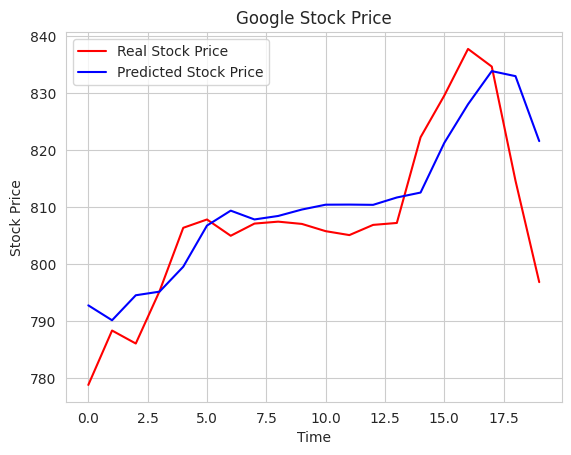

In [ ]:
plt.plot(real_stock_price,color='red',label='Real Stock Price')
plt.plot(predicted_stock_price,color='blue',label='Predicted Stock Price')
plt.title('Google Stock Price')
plt.ylabel('Stock Price')
plt.xlabel('Time')
plt.legend()
plt.show()